In [32]:
import cv2
import numpy as np
from scipy.signal import stft
from skimage import data, color
import matplotlib.pyplot as plt
from scipy import ndimage, fftpack 


In [4]:
def create_signal(fs, duration, freq1, amp1, freq2, amp2, noise_amp):
  t = np.arange(0, duration, 1/fs)
  x = (amp1) * np.sin(2 * np.pi * freq1 * t) + (amp2) * np.sin(2 * np.pi * freq2 * (t - 2)) + (noise_amp) * np.random.randn(len(t))
  return t, x

def plot_signal_with_fft(t, x, title=None):
  fig, axes = plt.subplots(1, 3, figsize=(25, 8))

  # Plot original signal
  axes[0].plot(t, x)
  axes[0].set_title("Original Signal" if title is None else f"{title} - Original Signal")
  axes[0].set_xlabel("Time (s)")
  axes[0].set_ylabel("Amplitude")
  axes[0].grid()

  # Compute FFT and plot without shifting
  fft_x = np.fft.fft(x)
  axes[1].plot(np.abs(fft_x))
  axes[1].set_title("FFT Magnitude without Shift")
  axes[1].set_xlabel("Frequency (Hz)")
  axes[1].set_ylabel("Magnitude")
  axes[1].grid()

  # Compute FFT and plot with shifting
  fft_x_shifted = np.fft.fftshift(fft_x)
  axes[2].plot(np.abs(fft_x_shifted))
  axes[2].set_title("FFT Magnitude with Shift")
  axes[2].set_xlabel("Frequency (Hz)")
  axes[2].set_ylabel("Magnitude")
  axes[2].grid()

  plt.tight_layout()
  plt.show()

In [ ]:
# Example usage:
fs = 100
duration = 10

# Create a grid of parameters
freq1_values = [10, 15, 20]
amp1_values = [0.5, 1.0, 1.5]
freq2_values = [30, 40, 50]
amp2_values = [1.0, 1.5, 2.0]
noise_amp_values = [1.0, 2.0, 3.0]

# Run the functions on the grid
for freq1 in freq1_values:
  for amp1 in amp1_values:
    for freq2 in freq2_values:
      for amp2 in amp2_values:
        for noise_amp in noise_amp_values:
          title = f"Freq1: {freq1}, Amp1: {amp1}, Freq2: {freq2}, Amp2: {amp2}, Noise: {noise_amp}"
          t, x = create_signal(fs, duration, freq1, amp1, freq2, amp2, noise_amp)
          plot_signal_with_fft(t, x, title)

In [6]:
def low_pass_filter(filter_size):

  lp_filter = np.ones((filter_size, filter_size))
  lp_filter /= filter_size * filter_size
  
  return lp_filter

def spatial_filtering(image, filter_size):
  
  lp_filter = low_pass_filter(filter_size)
  
  return ndimage.convolve(image, lp_filter, mode='constant', cval=0.0)

def naive_convolution_theorem(image, filter_size):
  lp_filter = low_pass_filter(filter_size)
  
  # Create a zero-padded image
  padded_filter = np.zeros_like(image)
  
  half_filter_size = filter_size // 2
  h, w = image.shape

  # Place the filter at the center of the padded image
  padded_filter[h//2 - half_filter_size:h//2 + half_filter_size + 1,
                w//2 - half_filter_size:w//2 + half_filter_size + 1] = lp_filter

  # Perform fftshift on the padded filter
  padded_filter_shifted = np.fft.fftshift(padded_filter)

  # Calculate the FFTs
  image_fft = np.fft.fft2(image)
  padded_filter_fft = np.fft.fft2(padded_filter_shifted)
  
  # Multiply the FFTs
  result_fft = image_fft * padded_filter_fft

  # Perform the inverse FFT and return the real part
  result = np.fft.ifft2(result_fft).real
  
  return result

def plot_results(image, filtered_image_spatial, filtered_image_naive):
  fig, axes = plt.subplots(1, 3, figsize=(18, 6))

  axes[0].imshow(image, cmap='gray')
  axes[0].set_title("Original Image")
  # axes[0].axis("off")

  axes[1].imshow(filtered_image_spatial, cmap='gray')
  axes[1].set_title("Spatial Filtering")
  # axes[1].axis("off")

  axes[2].imshow(filtered_image_naive, cmap='gray')
  axes[2].set_title("Naive Convolution Theorem")
  # axes[2].axis("off")

  plt.show()

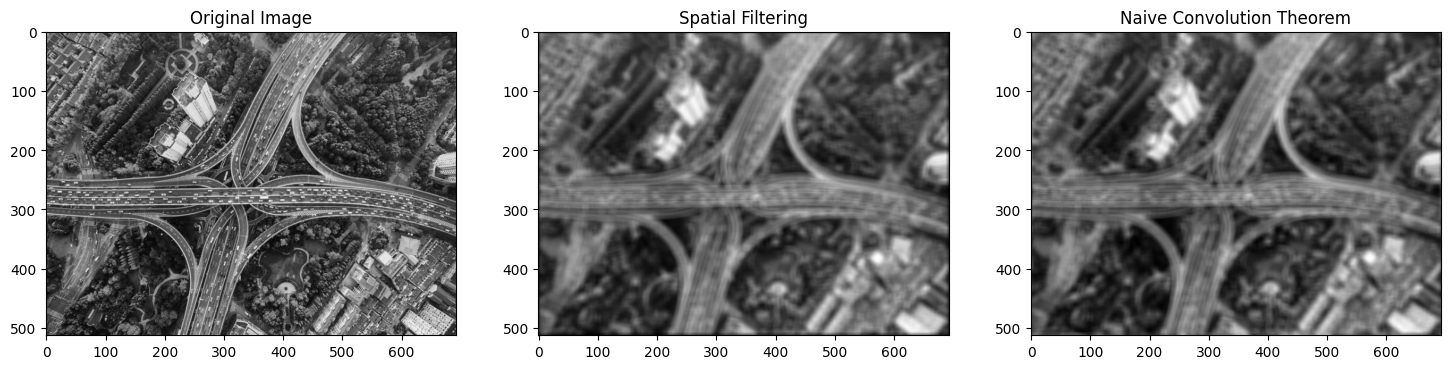

In [11]:
# Load an image and convert it to grayscale
path = '/content/cr.jpg'

image = plt.imread(path)
image_gray = np.mean(image, axis=2)

filter_size = 11

filtered_image_spatial = spatial_filtering(image_gray, filter_size)
filtered_image_naive = naive_convolution_theorem(image_gray, filter_size)

plot_results(image_gray, filtered_image_spatial, filtered_image_naive)

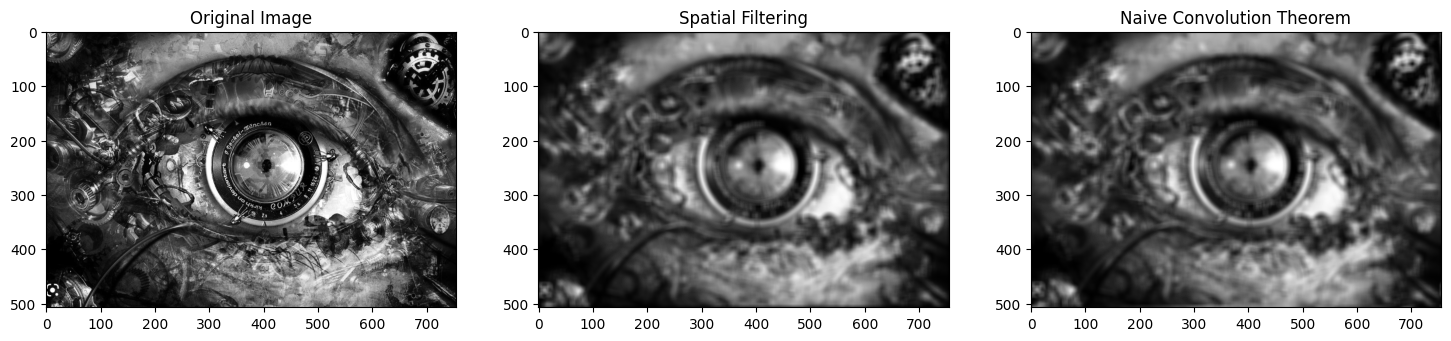

In [12]:
# Load an image and convert it to grayscale
path = '/content/e.jpg'

image = plt.imread(path)
image_gray = np.mean(image, axis=2)

filter_size = 11

filtered_image_spatial = spatial_filtering(image_gray, filter_size)
filtered_image_naive = naive_convolution_theorem(image_gray, filter_size)

plot_results(image_gray, filtered_image_spatial, filtered_image_naive)


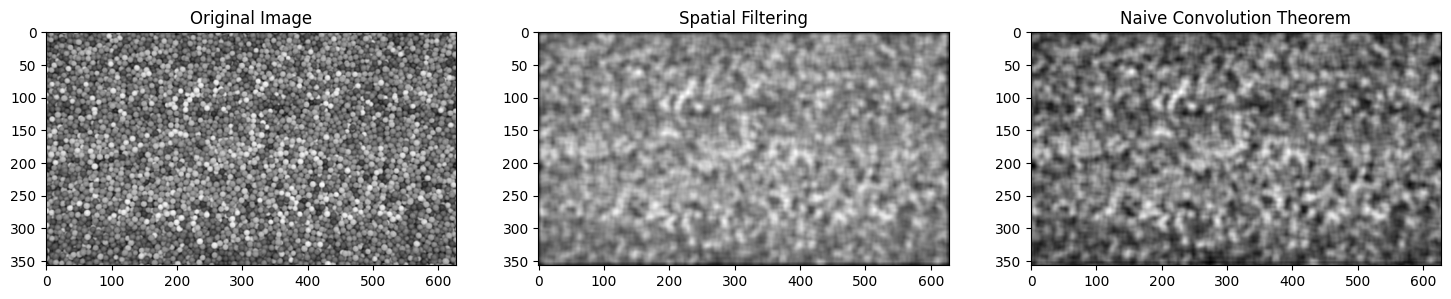

In [13]:
path = '/content/cc.jpg'

image = plt.imread(path)
image_gray = np.mean(image, axis=2)

filter_size = 11

filtered_image_spatial = spatial_filtering(image_gray, filter_size)
filtered_image_naive = naive_convolution_theorem(image_gray, filter_size)

plot_results(image_gray, filtered_image_spatial, filtered_image_naive)

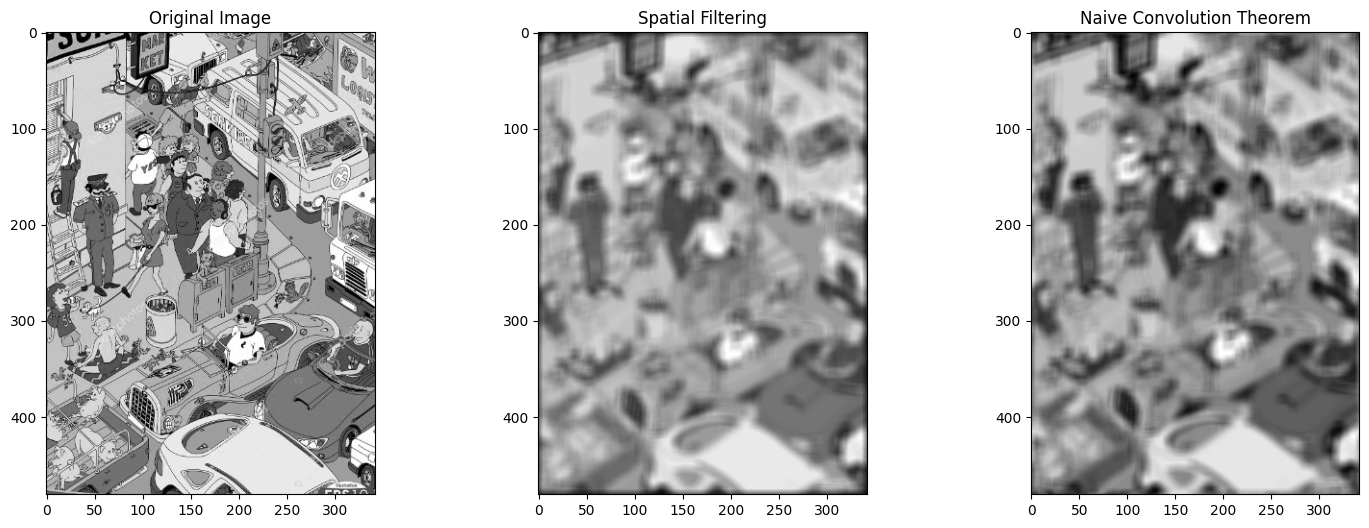

In [14]:
path = '/content/bb.jpg'
image = plt.imread(path)
image_gray = np.mean(image, axis=2)

filter_size = 11

filtered_image_spatial = spatial_filtering(image_gray, filter_size)
filtered_image_naive = naive_convolution_theorem(image_gray, filter_size)

plot_results(image_gray, filtered_image_spatial, filtered_image_naive)

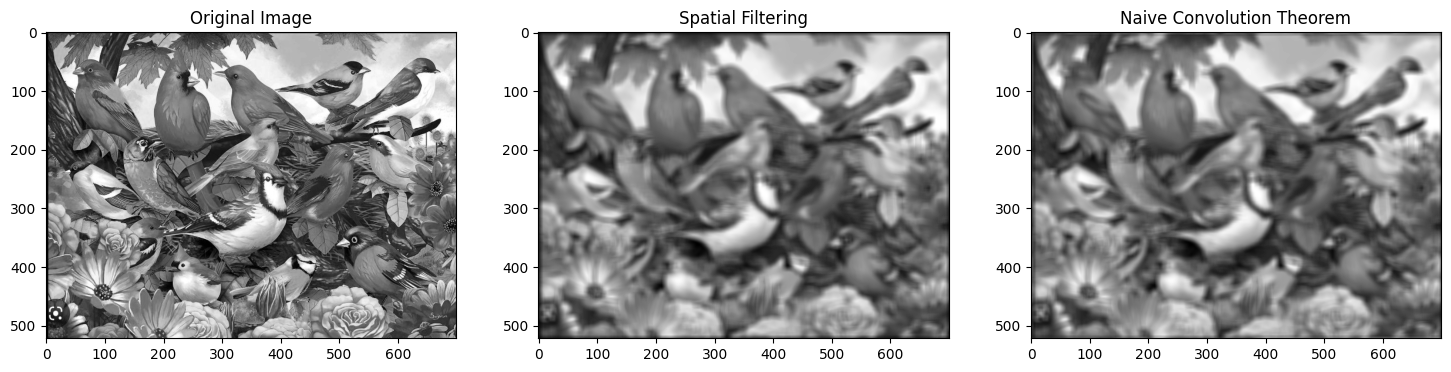

In [15]:
path = '/content/b.jpg'

image = plt.imread(path)
image_gray = np.mean(image, axis=2)

filter_size = 11

filtered_image_spatial = spatial_filtering(image_gray, filter_size)
filtered_image_naive = naive_convolution_theorem(image_gray, filter_size)

plot_results(image_gray, filtered_image_spatial, filtered_image_naive)

In [26]:
def ideal_lpf(D0, M, N):
  
  u = np.arange(M)
  v = np.arange(N)
  u = u - M // 2
  v = v - N // 2
  U, V = np.meshgrid(u, v)
  D = np.sqrt(U ** 2 + V ** 2)
  H = np.where(D <= D0, 1, 0)
  
  return H

def ideal_hpf(D0, M, N):
  return 1 - ideal_lpf(D0, M, N)

def gaussian_lpf(D0, M, N):
  
  u = np.arange(M)
  v = np.arange(N)
  u = u - M // 2
  v = v - N // 2
  U, V = np.meshgrid(u, v)
  D = np.sqrt(U ** 2 + V ** 2)
  H = np.exp(-(D ** 2) / (2 * (D0 ** 2)))
  
  return H

def gaussian_hpf(D0, M, N):
  return 1 - gaussian_lpf(D0, M, N)

def visualize_filter(filter_func, D0, M, N):
  H = filter_func(D0, M, N)
  H_shifted = np.fft.ifftshift(H)
  h = np.fft.ifft2(H_shifted).real
  
  # Apply log operation
  h_log = np.log1p(np.abs(h))
  
  plt.imshow(h_log, cmap='gray')
  plt.show()

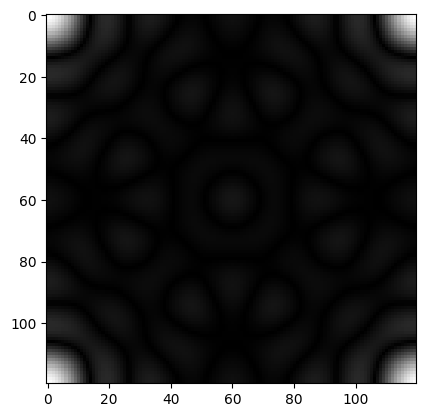

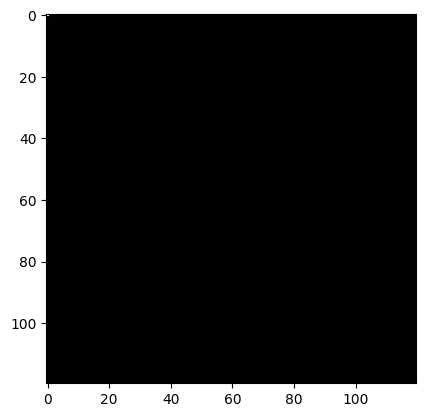

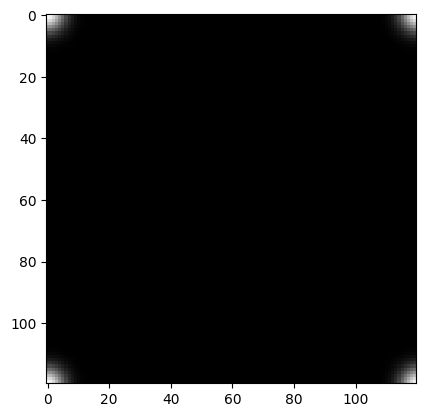

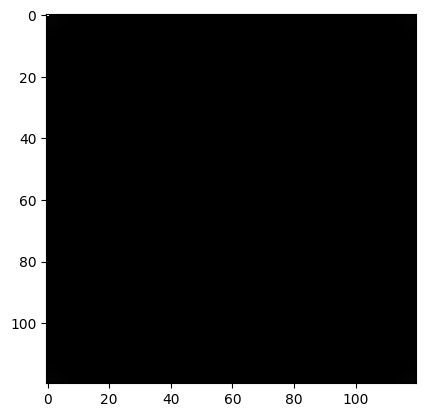

In [27]:
# Example usage:
M, N = 120, 120
D0 = 5

visualize_filter(ideal_lpf, D0, M, N)
visualize_filter(ideal_hpf, D0, M, N)

visualize_filter(gaussian_lpf, D0, M, N)
visualize_filter(gaussian_hpf, D0, M, N)

In [29]:
def corrupt_spectrum(F, points):
  F_corrupted = F.copy()
  for point in points:
    F_corrupted[point] = 0
  return F_corrupted

def restore_spectrum(F_corrupted, radius=1):
  F_restored = F_corrupted.copy()
  M, N = F_corrupted.shape
  for i in range(M):
    for j in range(N):
      if F_corrupted[i, j] == 0:
        neighbors = F_corrupted[max(0, i - radius):min(M, i + radius + 1), 
                                max(0, j - radius):min(N, j + radius + 1)]
        F_restored[i, j] = np.mean(neighbors)
  return F_restored

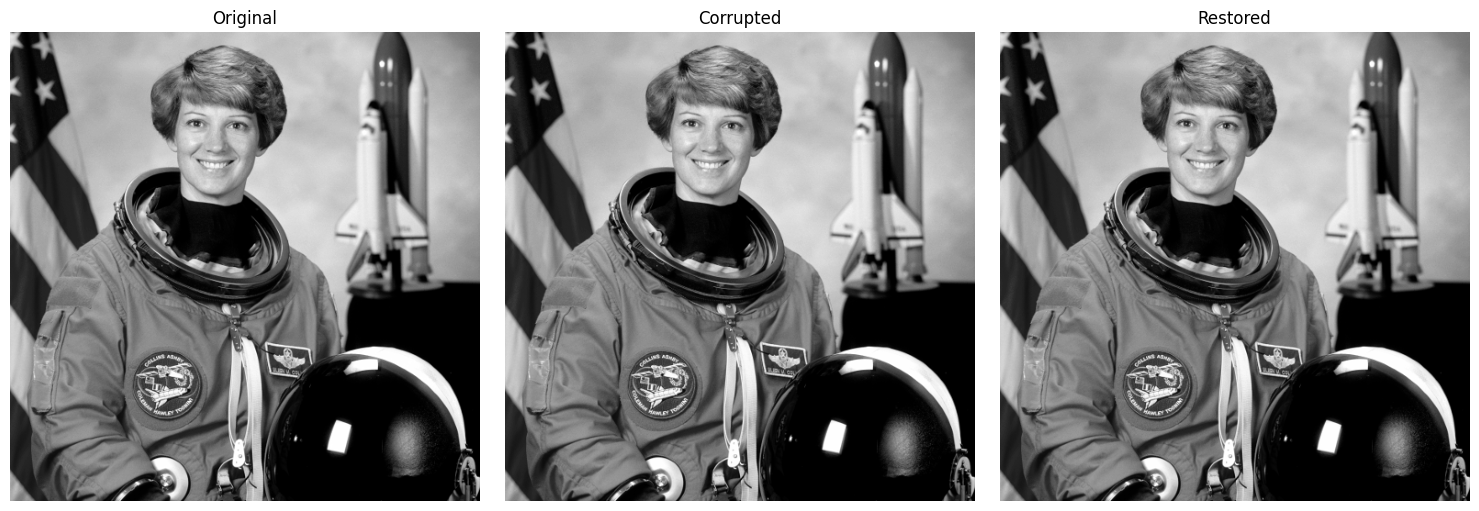

In [30]:
# Load an example image and convert to grayscale
image = color.rgb2gray(data.astronaut())
M, N = image.shape

# Compute 2D FFT
F = fftpack.fft2(image)

# Define points to corrupt
points = [(i, j) for i in range(M//2 - 5, M//2 + 5) for j in range(N//2 - 5, N//2 + 5)]

# Corrupt the spectrum
F_corrupted = corrupt_spectrum(F, points)

# Restore the spectrum
F_restored = restore_spectrum(F_corrupted, radius=1)

# Compute inverse 2D FFTs
image_corrupted = np.abs(fftpack.ifft2(F_corrupted))
image_restored = np.abs(fftpack.ifft2(F_restored))

# Display the images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original")

axes[1].imshow(image_corrupted, cmap='gray')
axes[1].set_title("Corrupted")

axes[2].imshow(image_restored, cmap='gray')
axes[2].set_title("Restored")

for ax in axes:
  ax.axis('off')

plt.tight_layout()
plt.show()

In [36]:
def compute_stft(signal, window, nperseg, noverlap):
  f, t, Zxx = stft(signal, window=window, nperseg=nperseg, noverlap=noverlap)
  return f, t, Zxx

def test_signal_1(t):
  return np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 20 * t)

def test_signal_2(t):
  return np.sin(2 * np.pi * 10 * t) * (1 - t) + np.sin(2 * np.pi * 20 * t) * t

def run_tests(signal_function, window='hann', nperseg=256, noverlap=128):
  t = np.linspace(0, 1, 1000)
  signal = signal_function(t)
  f, t_stft, Zxx = compute_stft(signal, window, nperseg, noverlap)
  
  plt.figure(figsize=(10, 8))
  plt.subplot(211)
  plt.plot(t, signal)
  plt.title('Signal')
  plt.subplot(212)
  plt.pcolormesh(t_stft, f, np.abs(Zxx), shading='gouraud')
  plt.title('STFT Magnitude')
  plt.xlabel('Time [s]')
  plt.ylabel('Frequency [Hz]')
  plt.show()

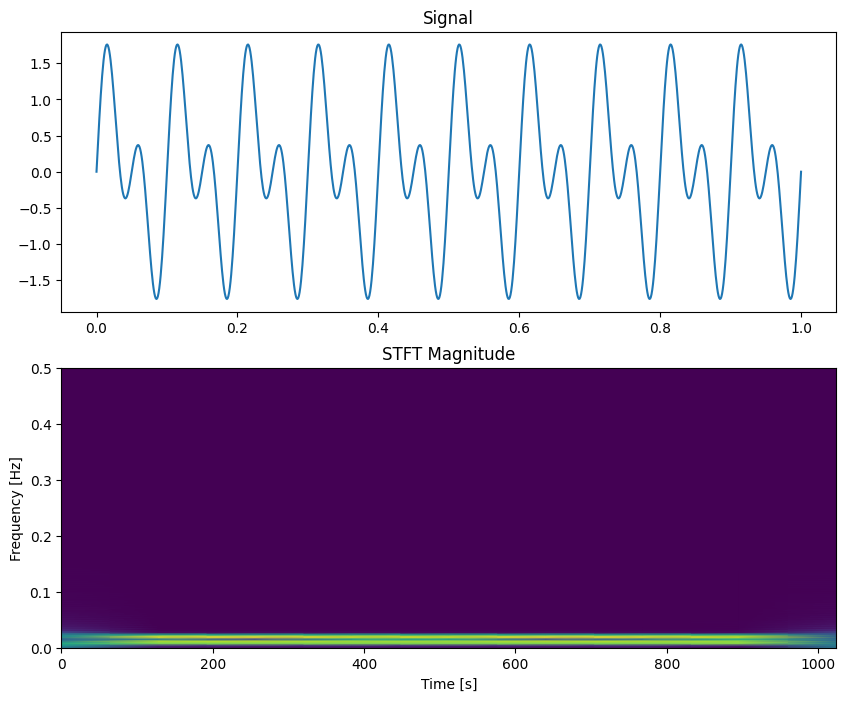

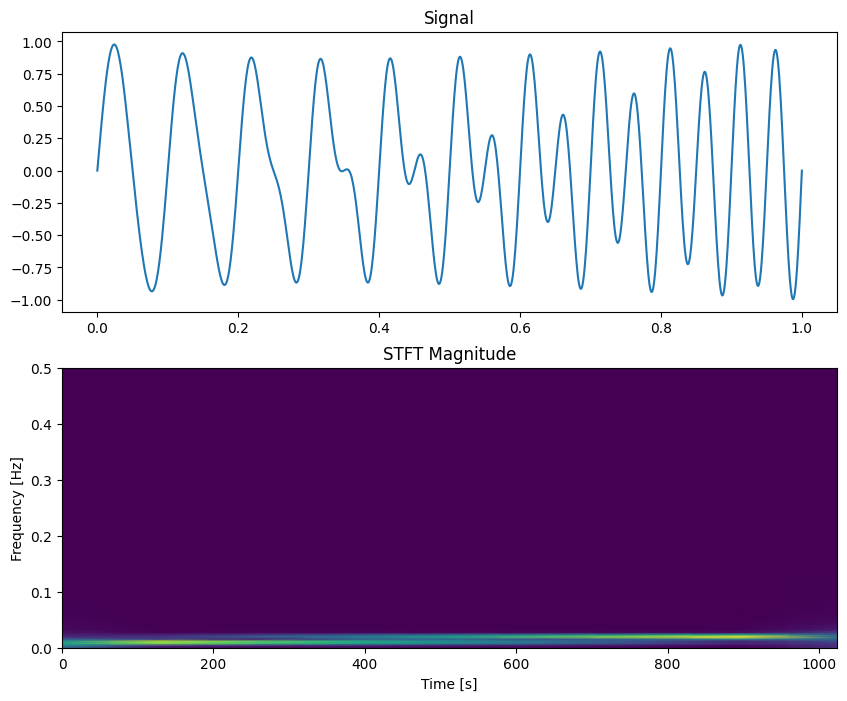

In [37]:
run_tests(test_signal_1)
run_tests(test_signal_2)